In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster

from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [22]:
#Read files
datafile = r'/gdrive/My Drive/Data Projects/Marketing Analytics/Lesson 3/ageinc.csv'
ageinc = pd.read_csv(datafile) #creates a dataframe
ageinc.head()

,income,age
0,101743,58
1,49597,27
2,36517,52
3,33223,49
4,72994,53


Create the standardized value columns for the income and age values

In [23]:
ageinc['z_income'] = (ageinc['income'] - ageinc['income'].mean())/ageinc['income'].std()

In [24]:
ageinc['z_age'] = (ageinc['age'] - ageinc['age'].mean())/ageinc['age'].std()

Use Matplotlib to plot the data

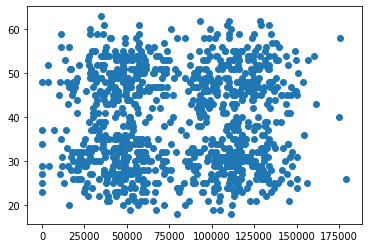

In [25]:
plt.scatter(ageinc['income'], ageinc['age'])

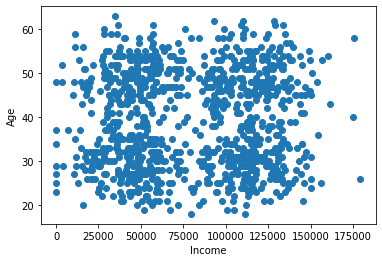

In [26]:
#label the axis
plt.xlabel('Income')
plt.ylabel('Age')
plt.scatter(ageinc['income'], ageinc['age'])

Perform K-means clustering

In [27]:
model = cluster.KMeans(n_clusters=4, random_state=10)
model.fit(ageinc[['z_income', 'z_age']])
#specifically only fit to z value columns bc dont want it to use the unstandardized variables for clustering

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [43]:
#create a column named cluster
ageinc['cluster'] = model.labels_
ageinc.head(10)

,income,age,z_income,z_age,cluster
0,101743,58,0.550812,1.693570,0
1,49597,27,-0.777331,-1.130565,1
2,36517,52,-1.110474,1.146963,2
3,33223,49,-1.194372,0.873660,2
4,72994,53,-0.181416,1.238064,2
5,38361,26,-1.063508,-1.221666,1
6,48579,29,-0.803259,-0.948363,1
7,115248,24,0.894781,-1.403869,3
8,11527,31,-1.746962,-0.766161,1
9,54096,51,-0.662742,1.055862,2


In [44]:
ageinc.to_csv('/gdrive/My Drive/Data Projects/Marketing Analytics/Lesson 3/clustering12.csv')

Plot the data points, color, and shape, coded by which cluster they belong to

In [31]:
colors = ['r', 'b', 'k', 'g'] 
markers = ['^', 'o', 'd', 's']

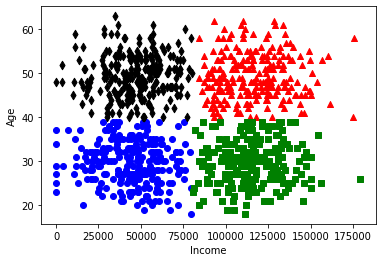

In [36]:
plt.xlabel('Income')
plt.ylabel('Age')

for c in ageinc['cluster'].unique():
  d = ageinc[ageinc['cluster'] == c]
  plt.scatter(d['income'], d['age'], marker=markers[c], color=colors[c])

Cluster Groups

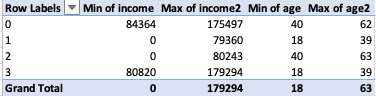

Created a PivotTable in Excel to determine the thresholds for each cluster. The following clusters were found: 


*  Younger with lower income - Cluster 1
*  Younger with higher income - Cluster 3
* Older with lower income - Cluster 2
* Older with higher income - Cluster 4


